### Student Information
Name:王紀堯

Student ID:112065516

GitHub ID: JiyaoWang14

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

Some preparing for the homework

In [1]:
### Begin Assignment Here
import pandas as pd
import helpers.data_mining_helpers as dmh
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go2
import math
import zipfile
%load_ext autoreload
%autoreload 2
%matplotlib inline






Part 1

In [2]:
#Prepare for part 1
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories,shuffle=True, random_state=42)
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X_sample = X.sample(n=1000,random_state=42)
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [3]:
#Excercise 1:
for t in twenty_train.data[:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background of the problem:
	I have a rectangular mesh in the uv

In [4]:
#Exercise 2
df_query = X.query("category_name == 'sci.med'")
df_query.head()

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
16,"From: texx@ossi.com (Robert ""Texx"" Woodworth) ...",2,sci.med
28,From: rind@enterprise.bih.harvard.edu (David R...,2,sci.med


In [5]:
#Exercise 3
X[X['category_name'] == 'sci.med'].iloc[::10][0:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


In [6]:
#Exercise 4
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

In [7]:
#Exercise 5
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [8]:
#Exercise 6
"""
1.Because of random sampling, X_sample doesn't arrange in order.
2.Sampling data may not balance, which means some category may appear frequently.
"""

"\n1.Because of random sampling, X_sample doesn't arrange in order.\n2.Sampling data may not balance, which means some category may appear frequently.\n"

277
category_name
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

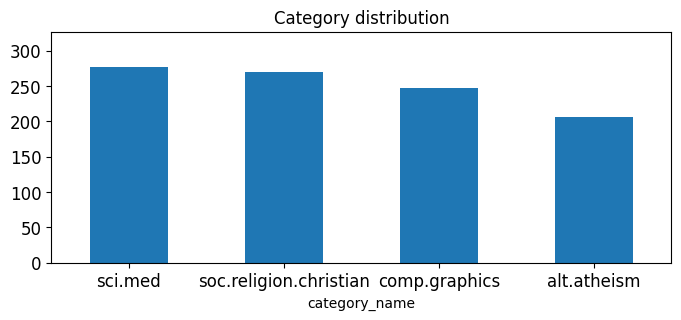

In [9]:
#Exercise 7
print(max(X_sample.category_name.value_counts()))
upper_bound = max(X_sample.category_name.value_counts() + 50) #277 + 50
print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

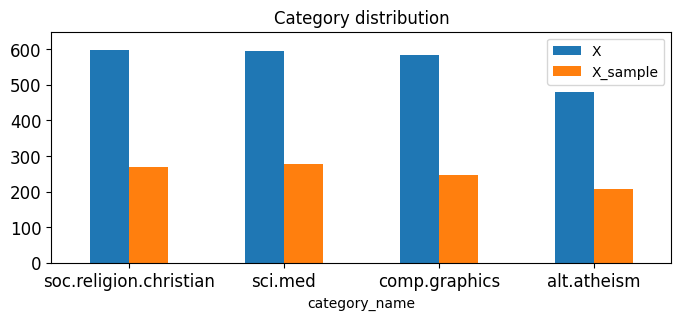

In [10]:
#Exercise 8
upper_bound = max(X.category_name.value_counts() + 50) #set upperbound
mixgraph=pd.merge(X.category_name.value_counts(),X_sample.category_name.value_counts(),on='category_name') #use merge function to merge X and X_sample
mixgraph.columns=['X','X_sample'] #set column name
mixgraph.plot(kind = 'bar',
              title = 'Category distribution',
              ylim = [0, upper_bound], 
              rot = 0, fontsize = 12, figsize = (8,3)) #draw the bar chart

In [11]:
#Exercise 9
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x)) 
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [12]:
#Exercise 10
p=X_counts[0:5, 0:100].tocsr().indices    #find the 1 in sparse matrix and transform it into array
q=len(p)  #get the length of that array
for i in range(q):    #print all 1 in sparse matrix which refer to different feature name
    print(count_vect.get_feature_names_out()[p[i]])

00
01


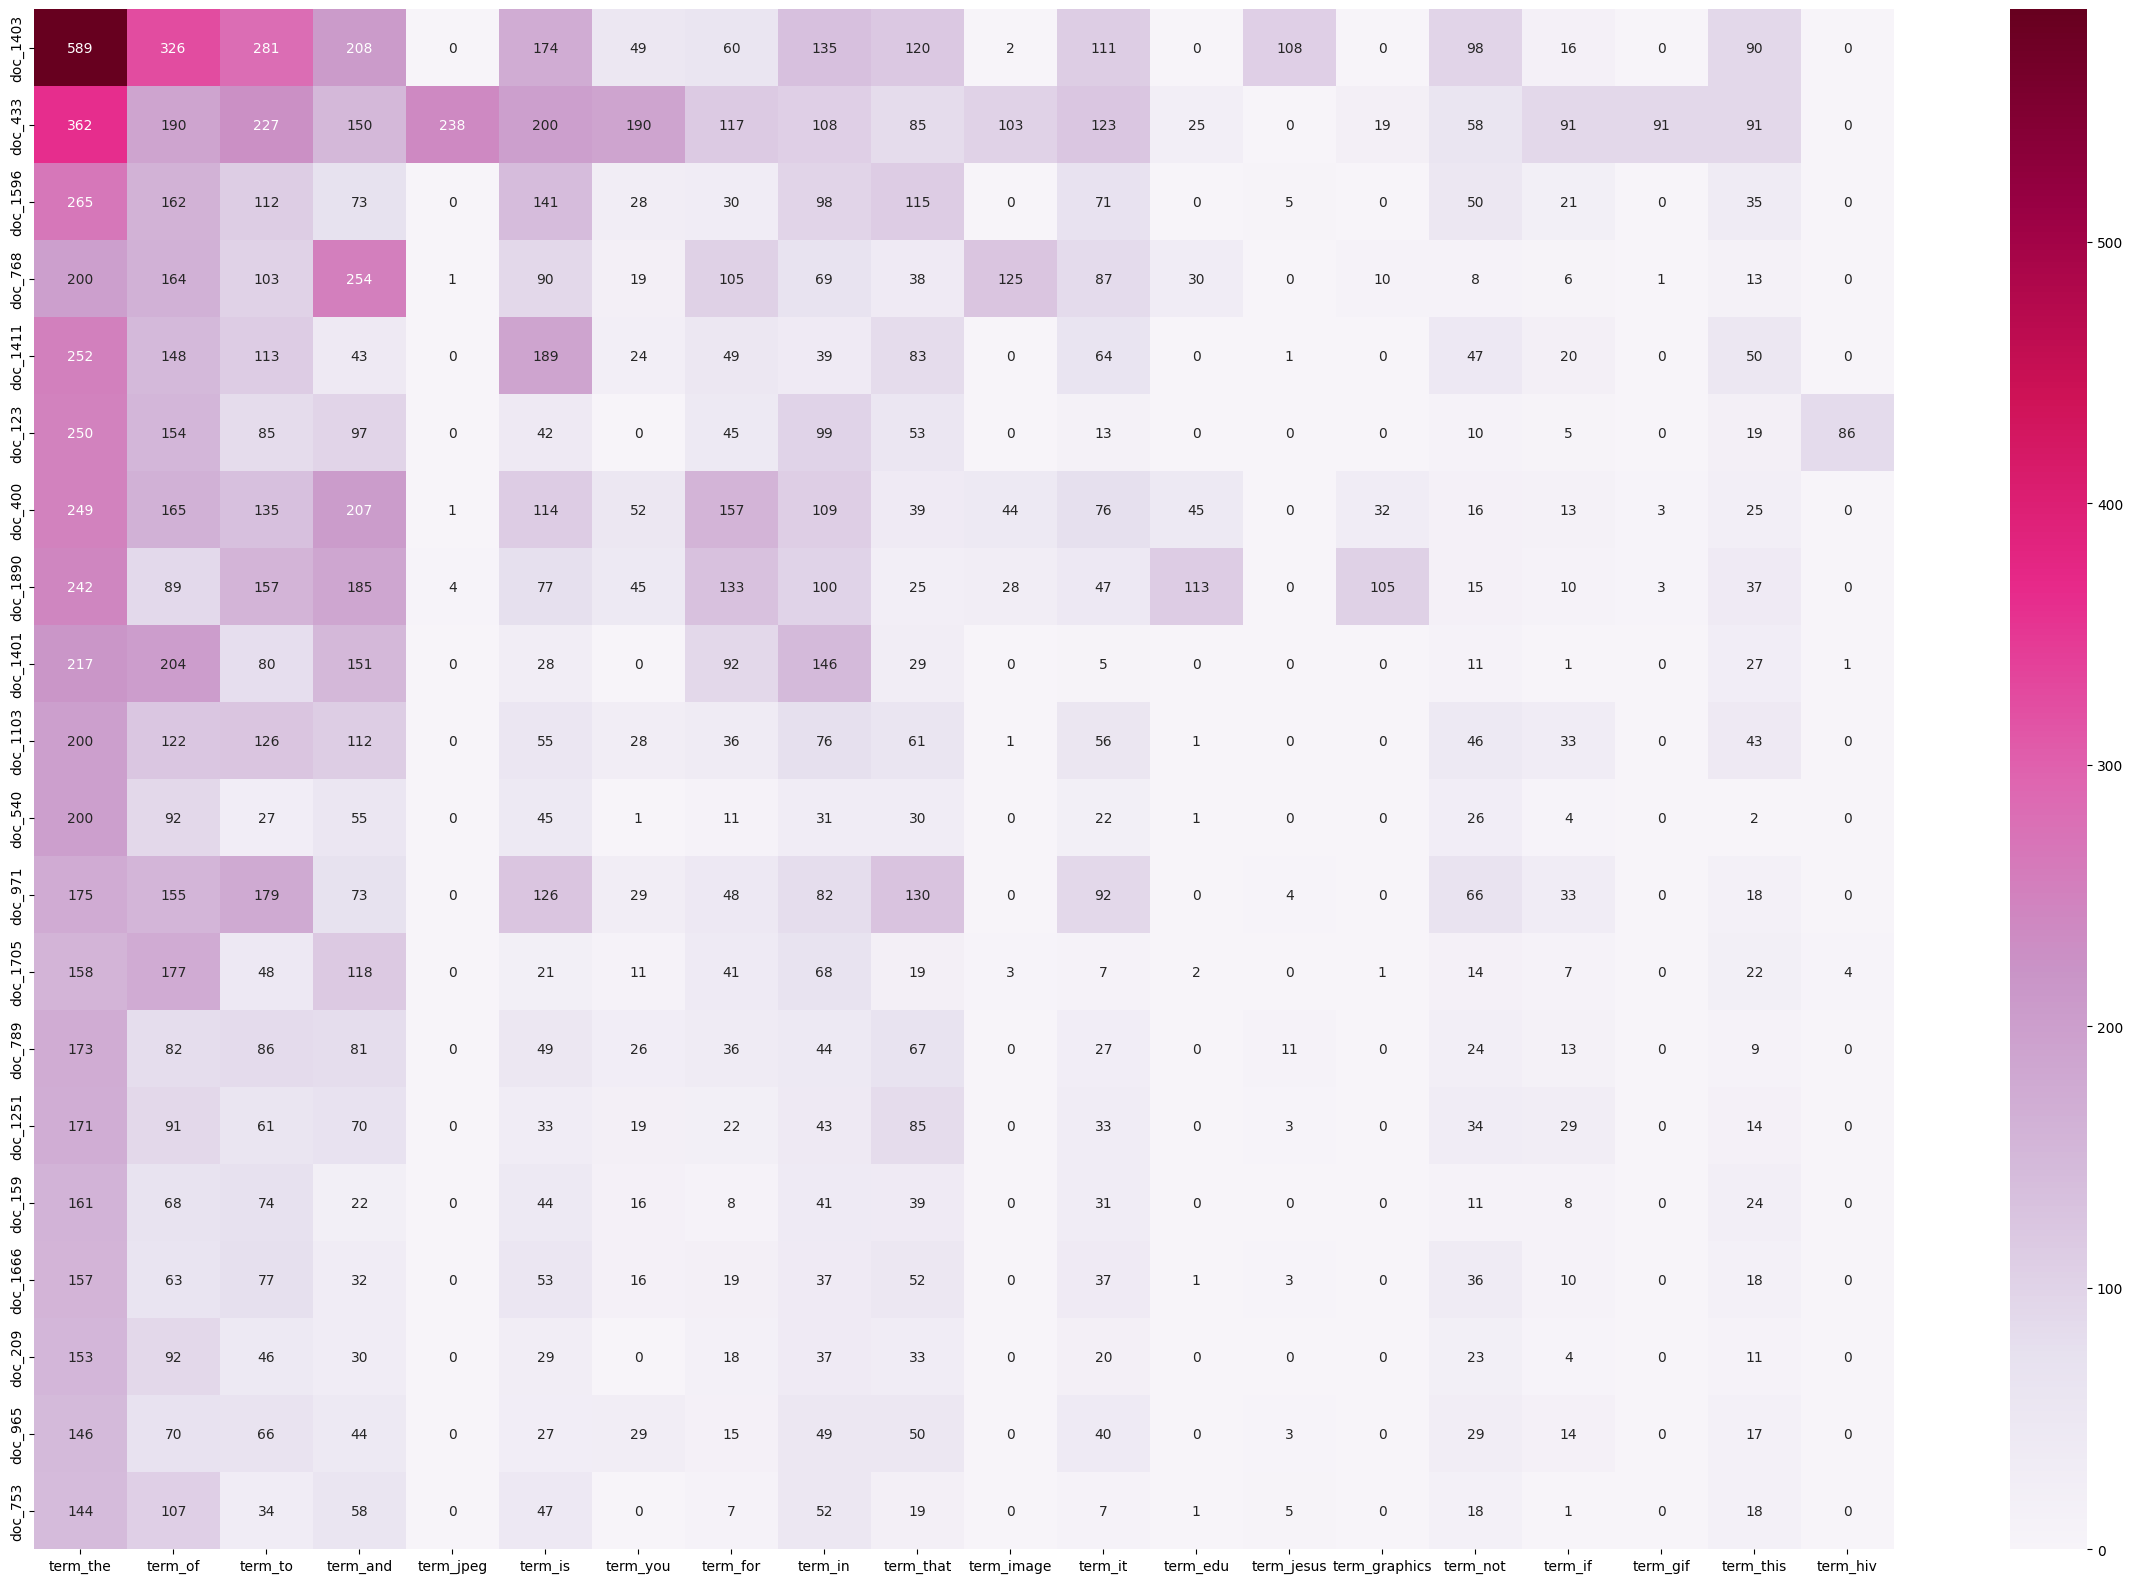

In [13]:
#Exercise 11
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()]
plot_y = ["doc_"+ str(i) for i in list(X.index)]
plot_z = X_counts.toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
df_todraw['rowmax']=df_todraw.max(axis=1,skipna=True)#caculate the times
df_todraw2=df_todraw.sort_values(by=['rowmax'],ascending=False)#sort it
df_todraw2=df_todraw2.head(20)#get top 20
df_todraw2=df_todraw2.drop('rowmax',axis=1)
df_todraw2.loc[len(df_todraw2.index)]=df_todraw2.max(axis=0,skipna=True)#caculate the times
df_33333=df_todraw2.sort_values(by=20,ascending=False,axis=1)#sort it
df_33333=df_33333.drop(20)
okok=df_33333.columns[:20]#get top 20
df_33333=df_33333[okok]
maxxx=df_33333.max(axis=1) 
maxxx2=maxxx.max(axis=0)
plt.subplots(figsize=(30, 20))#draw
ax = sns.heatmap(df_33333,
                cmap="PuRd",
                vmin=0, vmax=maxxx2, annot=True,fmt = 'd')

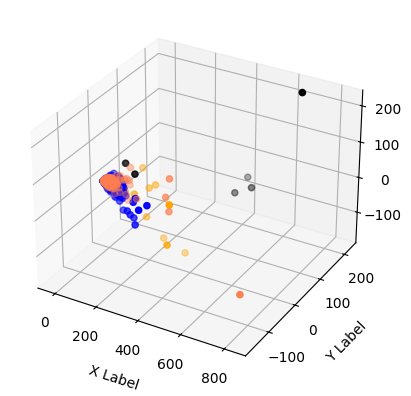

In [14]:
#Exercise 12 - 1
X_reduced2 = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'orange']

ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced2[X['category_name'] == category].T[0]
    ys = X_reduced2[X['category_name'] == category].T[1]
    zs = X_reduced2[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs ,c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

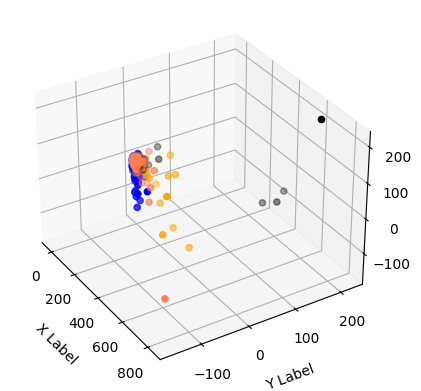

In [15]:
#Exercise 12 - 2
#change the view1
X_reduced2 = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'orange']

ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced2[X['category_name'] == category].T[0]
    ys = X_reduced2[X['category_name'] == category].T[1]
    zs = X_reduced2[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs ,c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(32,-32)

plt.show()

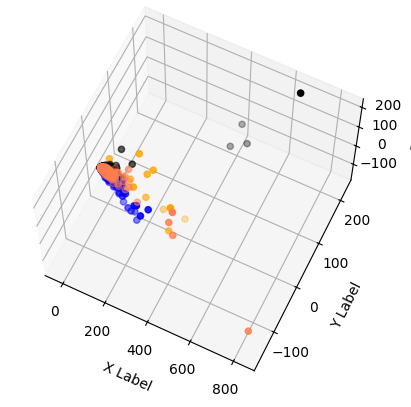

In [16]:
#Exercise 12 - 3
#change the view2
X_reduced2 = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'orange']

ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced2[X['category_name'] == category].T[0]
    ys = X_reduced2[X['category_name'] == category].T[1]
    zs = X_reduced2[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs ,c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(64,-64)

plt.show()

In [17]:
#Exercise 12 - 4
"""
some observation:
1.The blue points are still concentrated among three different views.
2.The yello points are not as concentrated as 2d plot.
"""

'\nsome observation:\n1.The blue points are still concentrated among three different views.\n2.The yello points are not as concentrated as 2d plot.\n'

In [18]:
#Exercise 13
# I use plotly to change the polt showing
line = go2.Scatter(x=count_vect.get_feature_names_out()[:300],y=term_frequencies[:300])
fig = go2.Figure(line)
fig.show()

C:\Users\JIYAO\AppData\Local\Temp\ipykernel_13484\1876629669.py:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



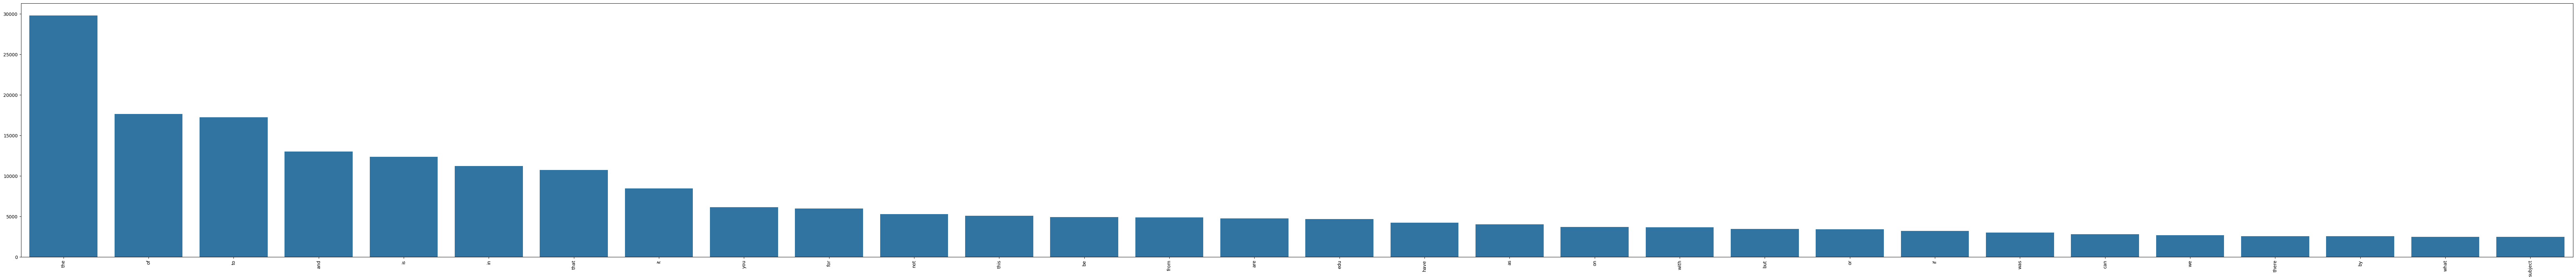

In [19]:
#Exercise 14
x=list(count_vect.get_feature_names_out())
y=term_frequencies
result1=[i for _, i in sorted(zip(y,x))] #sort 
y.sort()
plt.subplots(figsize=(100, 10))
xx=result1[::-1]
yy=y[::-1]
g = sns.barplot(x=xx[:30], # get top 30 elements
            y=yy[:30])
g.set_xticklabels(xx[:30], rotation = 90);

In [20]:
#Exercise 15
test = go2.Scatter(x=xx[:30],y=yy[:30],fill='tozeroy')
fig = go2.Figure(test)
fig.show()

In [21]:
#Exercise 16
mlb2 = preprocessing.LabelBinarizer()
mlb2.fit(X.category_name)
X['bin_category'] = mlb2.transform(X['category_name']).tolist()
X[0:9]
#yes it can work. Because there are four categories in category_name which is as same as category.

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


part 2

In [22]:
#Get the dataset
r=''
t=''
y=''
#Open the dataset
with open('yelp_labelled.txt',encoding="utf-8") as yelp:
    r = yelp.read()
with open('imdb_labelled.txt',encoding="utf-8") as imdb:
    t = imdb.read()
with open('amazon_cells_labelled.txt',encoding="utf-8") as ama:
    y = ama.read()
#Mix the three dataset
total = []
total.append(r)
total.append(t)
total.append(y)
total1=[]
total2=[]
#Split the dataset with \n and \t
for i in total:
    string = i.split('\n')
    total1.append(string)
for u in total1:
    for string in u:
        string = string.split('\t')
        total2.append(string)
#Transfer dataset to dataframe
data = pd.DataFrame(total2)
data.columns=['sentence','score']
display(data)



,sentence,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
2998,What a piece of junk.. I lose more calls on th...,0
2999,Item Does Not Match Picture.,0
3000,The only thing that disappoint me is the infra...,0
3001,"You can not answer calls with the unit, never ...",0


In [23]:
data.dropna(inplace=True) #eliminate null
display(data)

,sentence,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
2997,The screen does get smudged easily because it ...,0
2998,What a piece of junk.. I lose more calls on th...,0
2999,Item Does Not Match Picture.,0
3000,The only thing that disappoint me is the infra...,0


In [24]:
data.drop_duplicates(inplace=True) #eliminate duplicate data
sum(data.duplicated())
display(data)



,sentence,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
2997,The screen does get smudged easily because it ...,0
2998,What a piece of junk.. I lose more calls on th...,0
2999,Item Does Not Match Picture.,0
3000,The only thing that disappoint me is the infra...,0


part 3

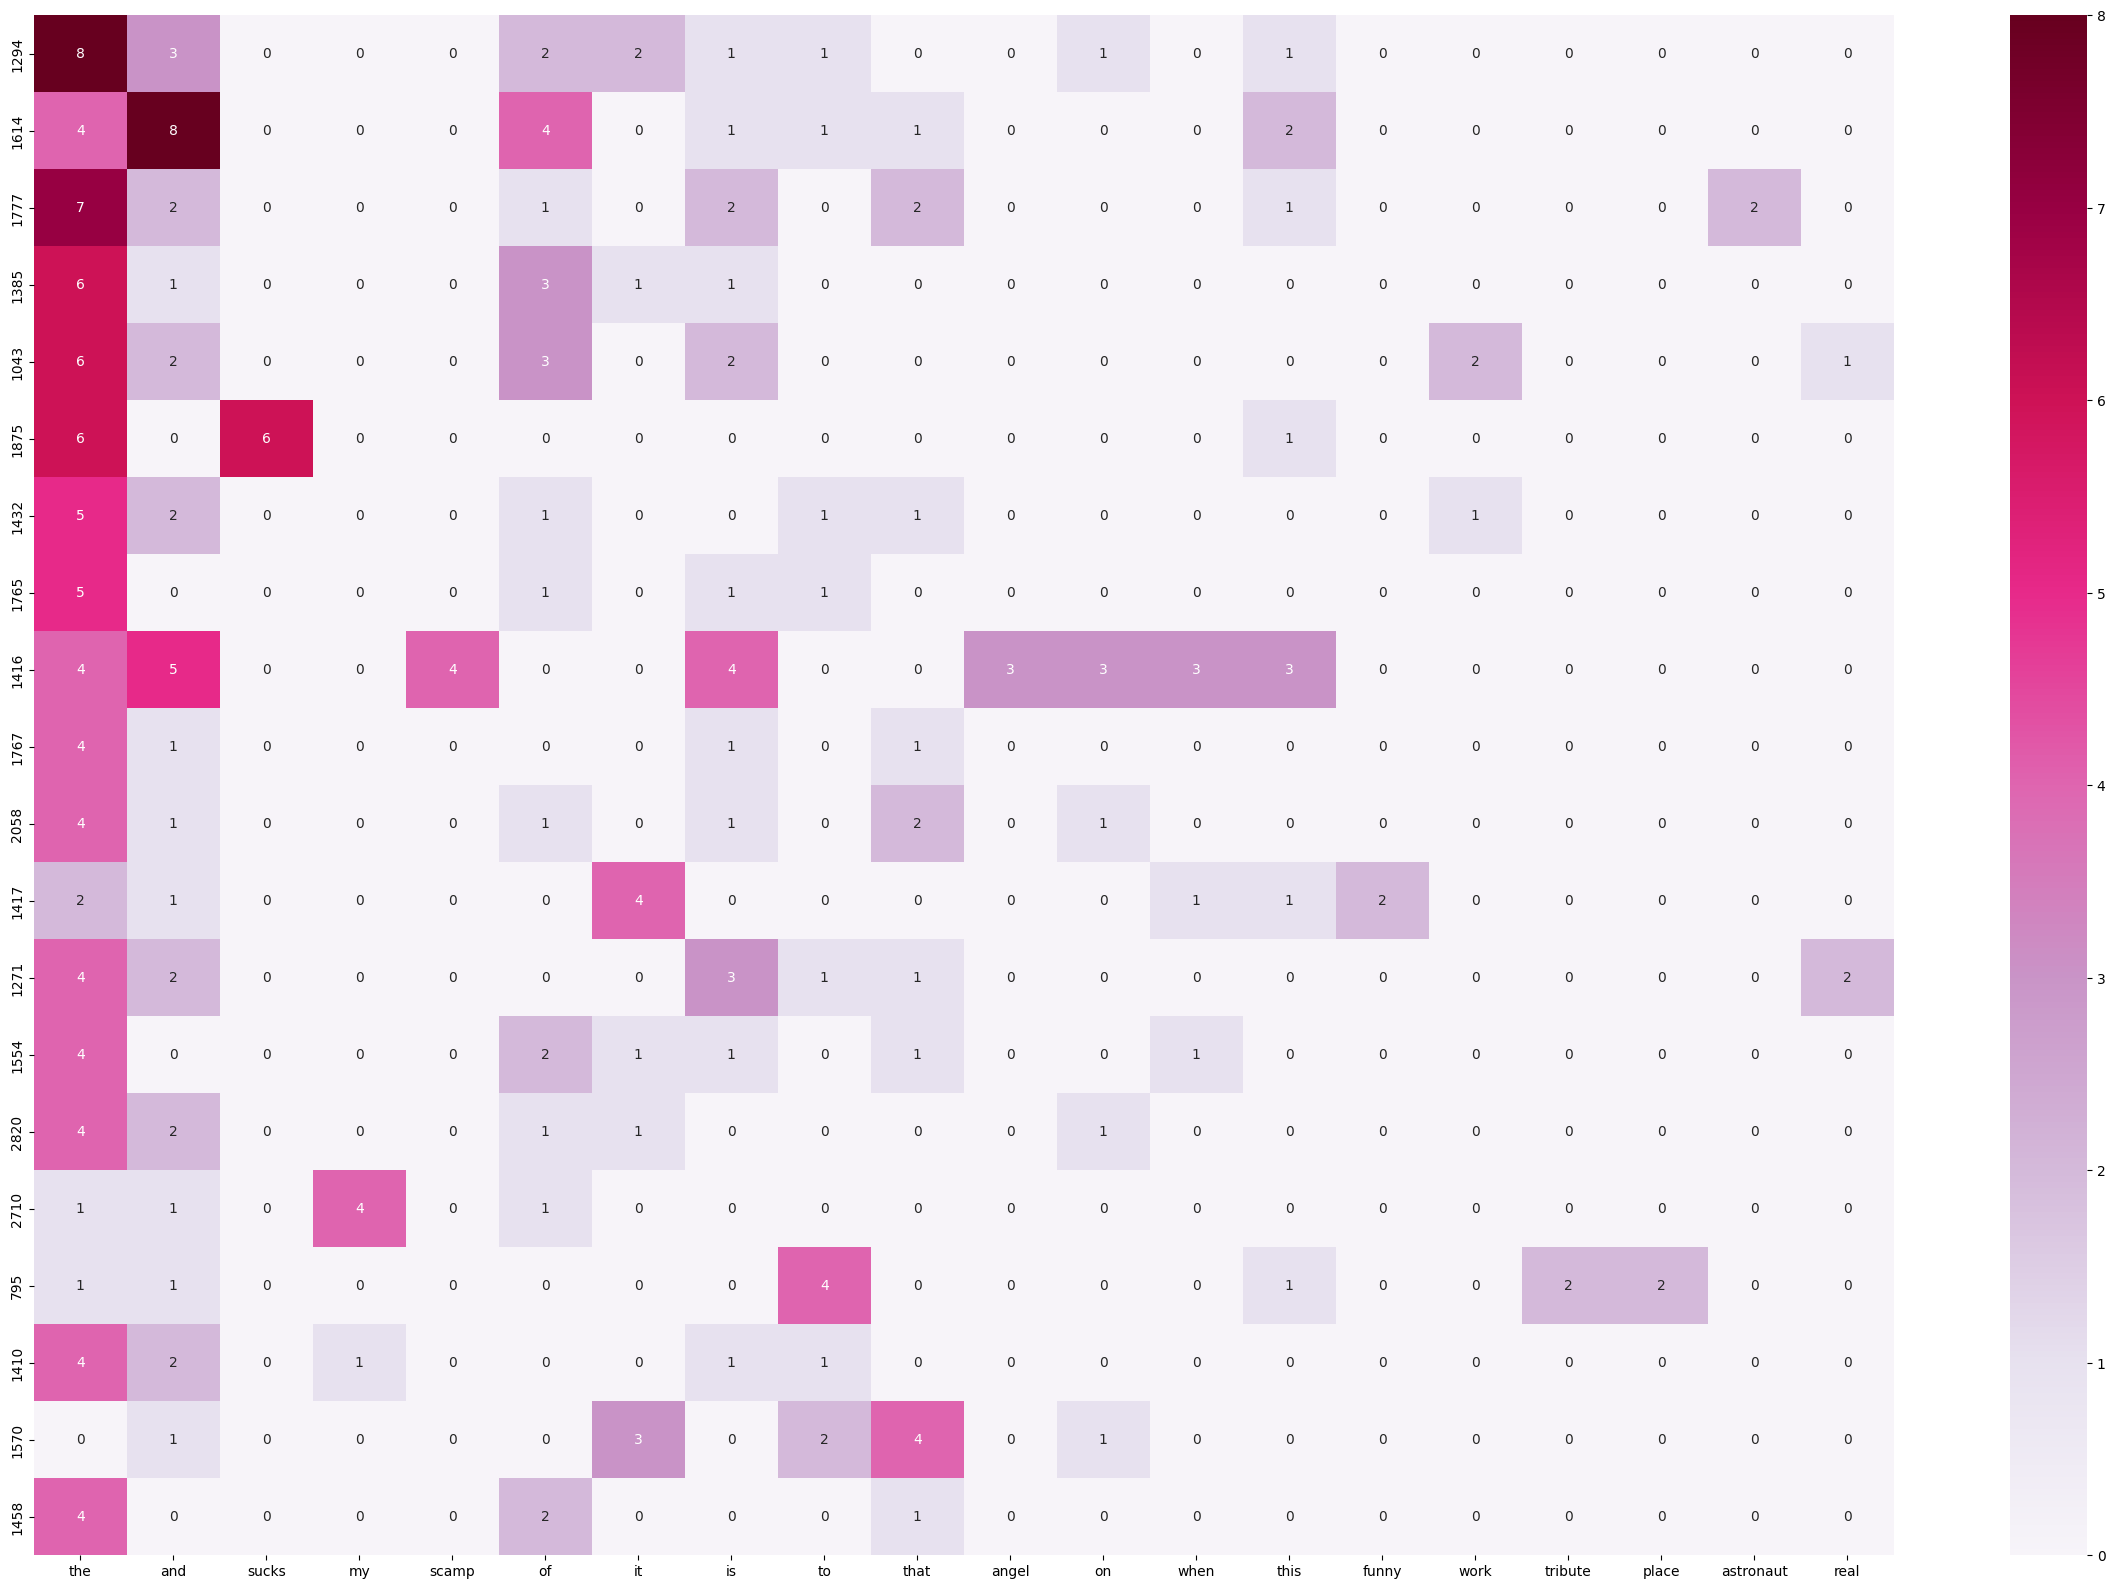

In [25]:
#Data vistualization
from sklearn.feature_extraction.text import CountVectorizer
data['unigrams'] = data['sentence'].apply(lambda x: dmh.tokenize_text(x))
count_vect2 = CountVectorizer()
data_counts = count_vect2.fit_transform(data['sentence']) 
plot_x1 = count_vect2.get_feature_names_out().tolist()
plot_y1 = data.index.tolist()
plot_z1 = data_counts.toarray()
drawresult = pd.DataFrame(plot_z1, columns = plot_x1)
drawresult['rowmax2']=drawresult.max(axis=1,skipna=True)#caculate the times
sum(drawresult.duplicated())
drawresult2=drawresult.sort_values(by=('rowmax2'),ascending=False)#sort it
drawresult2=drawresult2.head(20)#get top 20
drawresult2=drawresult2.drop('rowmax2',axis=1)
drawresult2.loc[len(drawresult2.index)]=drawresult2.max(axis=0,skipna=True)#caculate the times
drawresult3=drawresult2.sort_values(by=20,ascending=False,axis=1)#sort it
drawresult3=drawresult3.drop(20)
finalresult=drawresult3.columns[:20]#get top 20
drawresult3=drawresult3[finalresult]
maxxxx=drawresult3.max(axis=1) 
maxxxx2=maxxxx.max(axis=0)
plt.subplots(figsize=(30, 20))#draw
ax = sns.heatmap(drawresult3,
                cmap="PuRd",
                vmin=0, vmax=maxxxx2, annot=True)

In [26]:
#TF-IDF implementation
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(smooth_idf=False)
tfidt_matrix = tfidf_vec.fit_transform(data['sentence'])
print(tfidt_matrix)

  (0, 3351)	0.4058042954358468
  (0, 4558)	0.24472234914014468
  (0, 2711)	0.5608835696645615
  (0, 5112)	0.6788545255925484
  (1, 1993)	0.36199934549480156
  (1, 3063)	0.33454691721623786
  (1, 2427)	0.252341922901666
  (1, 1112)	0.8326814444844658
  (2, 2994)	0.526980715438791
  (2, 2493)	0.2933410760126334
  (2, 4968)	0.19268197384835953
  (2, 4523)	0.5468907667928378
  (2, 4531)	0.1250077518071607
  (2, 216)	0.1490572783644011
  (2, 4484)	0.45696931038436256
  (2, 3063)	0.23099896958984326
  (3, 2432)	0.09561194279137443
  (3, 3649)	0.3026492265226078
  (3, 4299)	0.3026492265226078
  (3, 3772)	0.3447260563148421
  (3, 3098)	0.21080988311287743
  (3, 2200)	0.3447260563148421
  (3, 388)	0.3447260563148421
  (3, 2804)	0.2528867129051118
  (3, 2572)	0.3026492265226078
  :	:
  (2980, 2434)	0.44250001783456516
  (2980, 3334)	0.4935774641923685
  (2980, 3063)	0.24595416225501165
  (2981, 2419)	0.4158974650870143
  (2981, 3416)	0.4158974650870143
  (2981, 2354)	0.4158974650870143
  (2981, 

In [27]:
#Naive Bayes classifier
#Preparing for Naive Bayes classifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score



tfidfdata=tfidt_matrix.toarray()
data2=data
#Set train data and test data
X_train, X_test = train_test_split(tfidfdata, test_size=0.25,random_state=42)
Y_train, Y_test = train_test_split(data2['score'], test_size=0.25,random_state=42)
Z_train, Z_test = train_test_split(data_counts, test_size=0.25,random_state=42)

#Use MultinomialNB to complete Naive Bayes classifier
classfier = MultinomialNB()
classfier2 = MultinomialNB()
print("train:",cross_val_score(classfier,tfidfdata,data2.score,cv=5).mean())
print("test:",cross_val_score(classfier2,data_counts,data2.score,cv=5).mean())


train: 0.8042286375951345
test: 0.8065798792620823


Different between TF-IDF and Count Vectorizer

TF-IDF:
TF-IDF is to get how much the words are relevant in document.

Count Vectorizer:
Count Vectorizer is to convert the string document into Vectorize token.

To sum up:
Countvectoeizer gives equal weightage to all the words, but TF-IDF says how important that word is to that document. That is to say, TF-IDF remove the woeds that less important for analysis.


part 4

Improve the efficience:
1. In pandas, use can "get memory directly" to improve the efficience.
2. Use "subtype" to the number data.
3. Change "int64, float64" into "uint8, float32".
4. Make object type change into category.
5. Use "fLine" to read the data.